In [1]:
# from gensim import corpora,models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import jieba

In [5]:
fj = pd.read_csv("链家二手房.csv",encoding='gbk')
fj

,小区名称,户型,面积,区域,楼层,朝向,单价（平方米）Y,建筑时间
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,104777,1992年建
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,67474,2002年建
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,59374,1988年建
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,67210,1997年建
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,59089,1987年建
5,潍坊三村,1室0厅,34.84,浦东,中区/5层,NaN,74626,1983年建
6,伟莱家园,2室2厅,100.15,浦东,中区/6层,朝南北,51422,2002年建
7,世茂滨江花园,3室2厅,260.39,浦东,中区/51层,朝西,84488,NaN
8,羽北小区,2室2厅,69.88,浦东,低区/6层,朝南,80137,1994年建
9,证大家园（公寓）,3室2厅,122.75,浦东,低区/11层,朝南北,63951,2002年建


In [469]:
fj.describe()

,面积,单价（平方米）Y
count,28201.000000,28201.000000
mean,96.218136,59725.836034
std,60.819286,21039.354067
min,21.110000,8996.000000
25%,58.870000,44943.000000
50%,85.410000,58068.000000
75%,116.150000,71740.000000
max,1832.580000,199639.000000


In [470]:
fj.describe(include = "object")#top代表众数，freq代表频数

,小区名称,户型,区域,楼层,朝向,建筑时间
count,28201,28201,28201,28201,26846,21985
unique,6300,44,17,151,21,66
top,奥林匹克花园,2室2厅,浦东,高区/6层,朝南北,1995年建
freq,99,6271,2599,5409,11436,1454


In [471]:
fj.面积.quantile(q=[0.25,0.5,0.75,0.95,0.975,0.9975])

0.2500     58.870
0.5000     85.410
0.7500    116.150
0.9500    187.680
0.9750    249.030
0.9975    487.905
Name: 面积, dtype: float64

In [472]:
#大样本》5000用ks法，小样本用sw法方差检验
fj.shape

(28201, 8)

In [473]:
fj.loc[fj.面积>480,:].shape

(75, 8)

C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0, flags=flags)


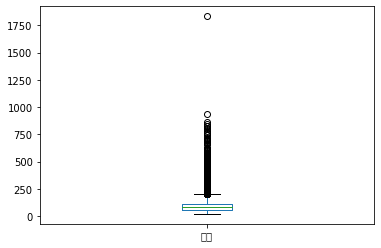

In [474]:
fj.面积.plot(kind='box')

In [475]:
fj.面积[fj.面积>=210]=210

C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### 利用盖帽法将异常值处理

C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0, flags=flags)


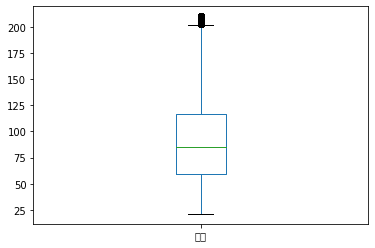

In [476]:
fj.面积.plot(kind='box')

#### 处理后的图像明显好了很多

In [477]:
from scipy import stats #方差检验包

In [478]:
# stats.kstest(fj['单价（平方米）Y'].values.reshape(-1,1),'norm')#原假设 符合正太，alpha 0.05  p=0,拒绝原假设

#### 原假设 符合正太，alpha 0.05  p=0,拒绝原假设

In [479]:
fj.describe(include='object')

,小区名称,户型,区域,楼层,朝向,建筑时间
count,28201,28201,28201,28201,26846,21985
unique,6300,44,17,151,21,66
top,奥林匹克花园,2室2厅,浦东,高区/6层,朝南北,1995年建
freq,99,6271,2599,5409,11436,1454


In [480]:
fj.户型.isna().sum()
fj.户型.value_counts()

2室2厅    6271
2室1厅    6244
3室2厅    6100
1室1厅    3585
3室1厅    1229
4室2厅    1160
1室0厅    1116
2室0厅    1013
1室2厅     508
5室2厅     223
4室3厅     210
5室3厅     191
3室0厅      76
6室3厅      65
3室3厅      49
6室2厅      37
4室1厅      32
5室4厅      22
6室4厅      12
4室4厅       9
7室2厅       5
2室3厅       5
7室3厅       4
5室1厅       4
8室2厅       3
9室6厅       3
8室4厅       2
5室0厅       2
3室4厅       2
4室5厅       2
5室5厅       2
7室4厅       2
9室4厅       2
8室3厅       1
9室9厅       1
1室3厅       1
4室0厅       1
9室2厅       1
6室1厅       1
7室5厅       1
9室3厅       1
2室4厅       1
6室5厅       1
9室5厅       1
Name: 户型, dtype: int64

In [481]:
# fj['室']=fj.户型.apply(lambda x:x[:1])
# fj['室']=fj.室.astype(int)

fj['室'] = fj.户型.apply(lambda x:x[:1])
fj.室 = fj.室.astype(int)
fj[['室','户型']].head()


,室,户型
0,2,2室0厅
1,3,3室2厅
2,1,1室1厅
3,1,1室1厅
4,1,1室0厅


In [482]:
fj['厅'] = fj.户型.apply(lambda x:x[x.find('室')+1:x.find('室')+2])
fj.厅 = fj.厅.astype(int)
fj[['室','户型','厅']].head()

,室,户型,厅
0,2,2室0厅,0
1,3,3室2厅,2
2,1,1室1厅,1
3,1,1室1厅,1
4,1,1室0厅,0


In [483]:
fj.describe()

,面积,单价（平方米）Y,室,厅
count,28201.000000,28201.000000,28201.000000,28201.000000
mean,92.302554,59725.836034,2.249246,1.473778
std,43.106476,21039.354067,0.910519,0.679300
min,21.110000,8996.000000,1.000000,0.000000
25%,58.870000,44943.000000,2.000000,1.000000
50%,85.410000,58068.000000,2.000000,2.000000
75%,116.150000,71740.000000,3.000000,2.000000
max,210.000000,199639.000000,9.000000,9.000000


In [484]:
fj.室.value_counts()#观察室数据，7-9-8 室的数据比较边缘,所以去除

2    13534
3     7456
1     5210
4     1414
5      444
6      116
7       12
9        9
8        6
Name: 室, dtype: int64

In [485]:
fj=fj.loc[fj.室<=6]
fj.head()

,小区名称,户型,面积,区域,楼层,朝向,单价（平方米）Y,建筑时间,室,厅
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,104777,1992年建,2,0
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,67474,2002年建,3,2
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,59374,1988年建,1,1
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,67210,1997年建,1,1
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,59089,1987年建,1,0


In [486]:
fj.室.value_counts()#处理完毕

2    13534
3     7456
1     5210
4     1414
5      444
6      116
Name: 室, dtype: int64

In [487]:
fj.厅.value_counts()# 对厅一看就发现问题了， 5-6-7厅的就有些问题了，数据已经处于边缘值（异常值）


2    14299
1    11095
0     2208
3      521
4       46
5        5
Name: 厅, dtype: int64

In [488]:
fj=fj.loc[fj.厅<=4,:]
fj.head()

,小区名称,户型,面积,区域,楼层,朝向,单价（平方米）Y,建筑时间,室,厅
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,104777,1992年建,2,0
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,67474,2002年建,3,2
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,59374,1988年建,1,1
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,67210,1997年建,1,1
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,59089,1987年建,1,0


In [489]:
fj.厅.value_counts()#经过上面步骤，厅只剩4以内的

2    14299
1    11095
0     2208
3      521
4       46
Name: 厅, dtype: int64

In [490]:
#fj.楼层.isna().sum()
fj['dangqianceng']=fj.楼层.apply(lambda x: x[:x.find("/")])
fj.head()

,小区名称,户型,面积,区域,楼层,朝向,单价（平方米）Y,建筑时间,室,厅,dangqianceng
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,朝南,104777,1992年建,2,0,低区
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,朝南,67474,2002年建,3,2,低区
2,博山小区,1室1厅,43.79,浦东,中区/6层,朝南,59374,1988年建,1,1,中区
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,朝南北,67210,1997年建,1,1,中区
4,博山小区,1室0厅,39.77,浦东,高区/6层,朝南,59089,1987年建,1,0,高区


In [491]:
fj['zonglouceng']=fj.楼层.apply(lambda x: x[x.find("/")+1:x.find("层")])


fj.tail()

,小区名称,户型,面积,区域,楼层,朝向,单价（平方米）Y,建筑时间,室,厅,dangqianceng,zonglouceng
28196,明珠花苑（崇明）,2室2厅,101.59,崇明,中区/6层,朝南北,20179,2004年建,2,2,中区,6
28197,玉屏新村,3室1厅,77.95,崇明,中区/6层,朝南,19243,NaN,3,1,中区,6
28198,凤辰乐苑,2室1厅,81.43,崇明,高区/6层,朝南北,25789,2008年建,2,1,高区,6
28199,绿舟星城,2室2厅,82.01,崇明,中区/6层,NaN,22558,NaN,2,2,中区,6
28200,富源花苑,2室2厅,90.61,崇明,高区/6层,朝南北,13243,2004年建,2,2,高区,6


In [492]:
fj['zonglouceng'].value_counts()

6       11070
5        1660
18       1518
7        1448
11       1316
14        949
24        715
17        663
12        545
13        491
16        480
8         411
28        404
20        392
4         362
29        358
15        342
32        328
地上3       318
地上2       318
26        316
30        296
19        280
27        274
31        273
25        272
22        270
21        252
10        224
23        216
        ...  
36        113
37        109
38         99
3          97
39         79
地上4        34
地上1        31
1          22
40         18
地上5        15
2          14
56          8
62          8
44          6
地上6         6
地上11        6
47          4
49          4
地上10        4
43          4
地上9         3
48          3
51          2
90          2
60          2
地上8         2
地上18        1
59          1
50          1
地上14        1
Name: zonglouceng, Length: 64, dtype: int64

In [493]:
fj['zonglouceng']=fj.zonglouceng.apply(lambda x: x.replace('地上',""))

In [494]:
fj.dangqianceng.value_counts()

高区          10174
中区           8877
低区           8379
地上3           318
地上2           316
地上4            34
地上1            31
地上5            15
地上11            6
地上6             6
地上10            4
地上9             3
地上8             2
地上2层 地下1        2
地上14            1
地上18            1
Name: dangqianceng, dtype: int64

In [495]:
import numpy as np 
louc=['高区','中区','低区']
# fj.dangqianceng=np.where(fj.dangqianceng not in ['高区','中区','低区'],'',fj.dangqianceng)
fj['dangqianceng']=fj.dangqianceng.apply(lambda x : x if x  in louc else '')

In [496]:
# fj.dangqianceng.value_counts()
fj.dangqianceng.value_counts()

高区    10174
中区     8877
低区     8379
        739
Name: dangqianceng, dtype: int64

In [497]:
fj['zonglouceng']=fj['zonglouceng'].astype(int)

In [498]:
fj.describe()

,面积,单价（平方米）Y,室,厅,zonglouceng
count,28169.000000,28169.000000,28169.000000,28169.000000,28169.000000
mean,92.173415,59727.321417,2.243388,1.471121,12.133054
std,42.958140,21030.429413,0.893016,0.672859,8.888181
min,21.110000,8996.000000,1.000000,0.000000,1.000000
25%,58.870000,44949.000000,2.000000,1.000000,6.000000
50%,85.320000,58070.000000,2.000000,2.000000,7.000000
75%,115.920000,71731.000000,3.000000,2.000000,18.000000
max,210.000000,199639.000000,6.000000,4.000000,90.000000


In [499]:
fj.zonglouceng.quantile([0.25,0.50,0.75,0.954,0.9975])#

0.2500     6.000
0.5000     7.000
0.7500    18.000
0.9540    31.272
0.9975    39.000
Name: zonglouceng, dtype: float64

###### 三倍便准差下的值为39 大于39 层的，都是异常值

In [500]:
fj.zonglouceng[fj.zonglouceng>39].count() 

63

#### 大于39 层的异常值不多，直接删除

In [501]:
fj=fj.loc[fj.zonglouceng<=39,:]

In [502]:
fj.zonglouceng[fj.zonglouceng>39].count() 

0

In [503]:
fj.describe(include='object')

,小区名称,户型,区域,楼层,朝向,建筑时间,dangqianceng
count,28106,28106,28106,28106,26757,21946,28106
unique,6286,28,17,127,21,65,4
top,奥林匹克花园,2室2厅,浦东,高区/6层,朝南北,1995年建,高区
freq,99,6248,2565,5408,11402,1454,10155


In [504]:
fj.建筑时间=fj.建筑时间.str.replace('年建','')
fj.建筑时间=fj.建筑时间.astype(float)

In [505]:
fj.建筑时间.isnull().sum()

6160

In [506]:
fj.建筑时间[fj.建筑时间.isna()] = fj.loc[fj.建筑时间.isna(),"小区名称"].apply(lambda x: fj.建筑时间[fj.小区名称==x].max())

C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [507]:
fj.建筑时间.isnull().sum()

4654

In [508]:
# from  sklearn.preprocessing import Imputer 
# imp = Imputer(missing_values='NaN',strategy='most_frequent',axis=0,verbose=0,copy=True)
# data.建筑时间 = imp.fit_transform(data.建筑时间.values.reshape(-1, 1))

In [509]:
### 补充缺失值

from sklearn.preprocessing import Imputer  
imp=Imputer(missing_values="NaN",strategy='most_frequent',axis=0,verbose=0,copy=True)
fj.建筑时间=imp.fit_transform(fj.建筑时间.values.reshape(-1,1))
fj.建筑时间.isnull().sum()


0

#### 补充缺失值

In [511]:
# #KNN　补充缺失值
# from sklearn.neighbors import KNeighborsClassifier  
# knn = KNeighborsClassifier()
# knn.fit(data.loc[~data.建筑时间.isna(),["室","厅","总楼层"]],data.建筑时间[~data.建筑时间.isna()])
# data.建筑时间[data.建筑时间.isna()]=knn.predict(data.loc[data.建筑时间.isna(),["室","厅","总楼层"]])

In [512]:

fj.rename( columns={'单价（平方米）Y':'单价'},inplace=True)
fj.describe()

,面积,单价,建筑时间,室,厅,zonglouceng
count,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000
mean,92.011228,59653.311677,1998.446204,2.242048,1.469971,12.048566
std,42.829304,20965.947362,9.053800,0.892682,0.673095,8.702264
min,21.110000,8996.000000,1912.000000,1.000000,0.000000,1.000000
25%,58.820000,44915.500000,1995.000000,2.000000,1.000000,6.000000
50%,85.215000,58012.500000,1997.000000,2.000000,2.000000,7.000000
75%,115.695000,71637.000000,2005.000000,3.000000,2.000000,18.000000
max,210.000000,199639.000000,2016.000000,6.000000,4.000000,39.000000


In [513]:
fj[["面积","单价"]].corr()

,面积,单价
面积,1.000000,0.041821
单价,0.041821,1.000000


In [514]:
from sklearn.feature_selection import f_regression #对单价 面积 进行f检验，原假设为 h0相关， p=0,小于0.05 拒绝原假设
f_regression(fj.面积.values.reshape(-1,1),fj.单价.values.reshape(-1,1))

C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([49.240198]), array([2.31594551e-12]))

In [515]:
fj.shape

(28106, 12)

In [516]:
F = 0.041821** 2 / (1 - 0.041821 ** 2) * (len(fj)-2)
from scipy import stats
pv = stats.f.sf(F, 1, (len(fj)-2))
print(F,pv)

49.23990513540503 2.3162906894574494e-12


In [517]:
from sklearn.feature_selection import f_regression
T = np.abs(0.041821 ) * np.sqrt((len(fj)-2)/(1 -0.041821 ** 2))
print(T,1-stats.t.cdf(T,(len(fj)-2)))

7.017115157627458 1.1580736369865008e-12


对朝向特征处理

In [518]:
fj.describe(include='object')

,小区名称,户型,区域,楼层,朝向,dangqianceng
count,28106,28106,28106,28106,26757,28106
unique,6286,28,17,127,21,4
top,奥林匹克花园,2室2厅,浦东,高区/6层,朝南北,高区
freq,99,6248,2565,5408,11402,10155


In [519]:
fj.朝向.unique()

array(['朝南', '朝南北', nan, '朝东北', '朝西南', '朝东南', '朝东', '朝', '朝西', '朝北',
       '朝东西', '(进门) 北', '(进门) 南', '朝西北', '(进门) 南北', '(进门) 东', '(进门) 西',
       '(进门)', '(进门) 东西', '(进门) 东南', '(进门) 西南', '(进门) 西北'], dtype=object)

In [520]:
fj.朝向=fj.朝向.str.replace('[朝  \(\) 进门]','')

In [521]:
fj.朝向.unique()

array(['南', '南北', nan, '东北', '西南', '东南', '东', '', '西', '北', '东西', '西北'],
      dtype=object)

In [522]:
fj.朝向[fj.朝向.isna() ]='南'

C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [523]:
fj.朝向[fj.朝向=='' ]='南'

C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [524]:
fj.朝向.unique()

array(['南', '南北', '东北', '西南', '东南', '东', '西', '北', '东西', '西北'],
      dtype=object)

In [525]:
fj.head()

,小区名称,户型,面积,区域,楼层,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng
0,梅园六街坊,2室0厅,47.72,浦东,低区/6层,南,104777,1992.0,2,0,低区,6
1,碧云新天地（一期）,3室2厅,108.93,浦东,低区/6层,南,67474,2002.0,3,2,低区,6
2,博山小区,1室1厅,43.79,浦东,中区/6层,南,59374,1988.0,1,1,中区,6
3,金桥新村四街坊（博兴路986弄）,1室1厅,41.66,浦东,中区/6层,南北,67210,1997.0,1,1,中区,6
4,博山小区,1室0厅,39.77,浦东,高区/6层,南,59089,1987.0,1,0,高区,6


In [526]:
# data.drop("楼层",axis=1,inplace=True)
fj.drop('户型',axis=1,inplace=True)

In [527]:
fj.drop('楼层',axis=1,inplace=True)
fj.head()

,小区名称,面积,区域,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng
0,梅园六街坊,47.72,浦东,南,104777,1992.0,2,0,低区,6
1,碧云新天地（一期）,108.93,浦东,南,67474,2002.0,3,2,低区,6
2,博山小区,43.79,浦东,南,59374,1988.0,1,1,中区,6
3,金桥新村四街坊（博兴路986弄）,41.66,浦东,南北,67210,1997.0,1,1,中区,6
4,博山小区,39.77,浦东,南,59089,1987.0,1,0,高区,6


In [528]:
fj.describe(include='object')

,小区名称,区域,朝向,dangqianceng
count,28106,28106,28106,28106
unique,6286,17,10,4
top,奥林匹克花园,浦东,南,高区
freq,99,2565,13726,10155


In [529]:
fj.dangqianceng[fj.dangqianceng==""]='高区'#众数填充

C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [530]:
fj.describe()

,面积,单价,建筑时间,室,厅,zonglouceng
count,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000,28106.000000
mean,92.011228,59653.311677,1998.446204,2.242048,1.469971,12.048566
std,42.829304,20965.947362,9.053800,0.892682,0.673095,8.702264
min,21.110000,8996.000000,1912.000000,1.000000,0.000000,1.000000
25%,58.820000,44915.500000,1995.000000,2.000000,1.000000,6.000000
50%,85.215000,58012.500000,1997.000000,2.000000,2.000000,7.000000
75%,115.695000,71637.000000,2005.000000,3.000000,2.000000,18.000000
max,210.000000,199639.000000,2016.000000,6.000000,4.000000,39.000000


#### 查看单价是否正态

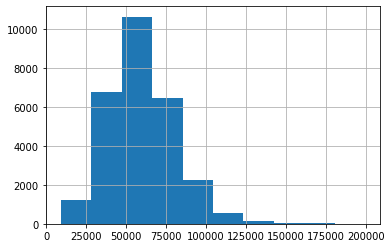

In [531]:
fj.单价.hist()

In [532]:
# from  scipy import stats
# stats.kstest(data.单价,"norm")

NameError: name 'data' is not defined

In [533]:
from scipy import stats
stats.kstest(fj.单价,"norm")#"norm" 干啥的  原假设：相关    拒绝原假设

KstestResult(statistic=1.0, pvalue=0.0)

In [534]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
g=onehot.fit(fj.区域.values.reshape(-1, 1))
tt =g.transform(fj.区域.values.reshape(-1, 1)).toarray()
pd.DataFrame(tt,columns=fj.区域.unique())

,浦东,闵行,宝山,徐汇,普陀,杨浦,长宁,松江,嘉定,黄浦,静安,闸北,虹口,奉贤,青浦,金山,崇明
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [535]:
# merge 合并表

junjia_table=fj.groupby('小区名称').单价.agg({'小区均价':"mean"})
junjia_table


C:\Users\WANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,小区均价
小区名称,
MAX未来,30137.800000
一品新筑苑,68471.500000
一品漫城（一期）（公寓）,65837.166667
丁香公寓,106944.600000
丁香园,60178.500000
万业新阶,92113.833333
万东小区,62555.000000
万东第二小区,57437.000000
万临家园,54100.000000


In [536]:
fj=fj.merge(junjia_table,how='left',on='小区名称')
fj.head()

,小区名称,面积,区域,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng,小区均价
0,梅园六街坊,47.72,浦东,南,104777,1992.0,2,0,低区,6,102639.000000
1,碧云新天地（一期）,108.93,浦东,南,67474,2002.0,3,2,低区,6,68290.333333
2,博山小区,43.79,浦东,南,59374,1988.0,1,1,中区,6,58330.333333
3,金桥新村四街坊（博兴路986弄）,41.66,浦东,南北,67210,1997.0,1,1,中区,6,60734.200000
4,博山小区,39.77,浦东,南,59089,1987.0,1,0,高区,6,58330.333333


In [537]:
# from statsmodels.formula.api import ols
# from sklearn.model_selection import train_test_split


from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split  # 拆分训练集

C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\WANG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0, flags=flags)


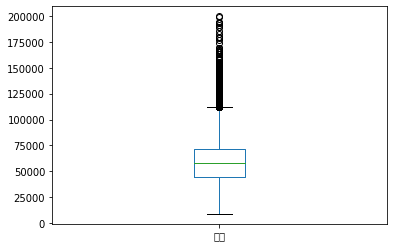

In [538]:
fj.单价.plot(kind="box")

In [539]:
fj = fj.loc[fj.单价<110000,:]

In [540]:
train,test =train_test_split(fj,test_size=0.3,random_state=42)

In [541]:
fj.head()

,小区名称,面积,区域,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng,小区均价
0,梅园六街坊,47.72,浦东,南,104777,1992.0,2,0,低区,6,102639.000000
1,碧云新天地（一期）,108.93,浦东,南,67474,2002.0,3,2,低区,6,68290.333333
2,博山小区,43.79,浦东,南,59374,1988.0,1,1,中区,6,58330.333333
3,金桥新村四街坊（博兴路986弄）,41.66,浦东,南北,67210,1997.0,1,1,中区,6,60734.200000
4,博山小区,39.77,浦东,南,59089,1987.0,1,0,高区,6,58330.333333


In [542]:
from statsmodels.formula.api import ols
model = ols("单价~面积+区域+朝向+建筑时间+室+厅+dangqianceng+zonglouceng+小区均价",data=train).fit()
#模型内 -1 去除常数项
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     单价   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     7791.
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:01:43   Log-Likelihood:            -1.9187e+05
No. Observations:               19317   AIC:                         3.838e+05
Df Residuals:                   19283   BIC:                         3.841e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -7.969e+04   1.06

In [543]:
#fj.drop('小区名称',axis=1,inplace=True)#删除小区名称


In [562]:
train_col= [i  for i in list(fj.columns) if( i!='单价' and i!= '小区名称')]
train_col
#

['面积', '区域', '朝向', '建筑时间', '室', '厅', 'dangqianceng', 'zonglouceng', '小区均价']

In [563]:
y_yuce = model.predict(train[train_col])

ppe = np.abs(y_yuce-train.单价)/train.单价  #ppe 表示残差绝对值 除 以 平均数
(ppe<0.1).sum()/len(ppe)   # ppe<0.1认为模型预测准确

0.8329968421597557

In [564]:
# 测试集
y_test_yuce = model.predict(test[train_col])
ppe = np.abs(y_test_yuce-test.单价)/test.单价
(ppe<0.1).sum()/len(ppe)

0.8288440632926682

# 测试数据和 训练数据的准确率在百分之80以上

In [565]:
fj.head()

,小区名称,面积,区域,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng,小区均价
0,梅园六街坊,47.72,浦东,南,104777,1992.0,2,0,低区,6,102639.000000
1,碧云新天地（一期）,108.93,浦东,南,67474,2002.0,3,2,低区,6,68290.333333
2,博山小区,43.79,浦东,南,59374,1988.0,1,1,中区,6,58330.333333
3,金桥新村四街坊（博兴路986弄）,41.66,浦东,南北,67210,1997.0,1,1,中区,6,60734.200000
4,博山小区,39.77,浦东,南,59089,1987.0,1,0,高区,6,58330.333333


In [566]:
new = fj.iloc[[2,10],:]
new

,小区名称,面积,区域,朝向,单价,建筑时间,室,厅,dangqianceng,zonglouceng,小区均价
2,博山小区,43.79,浦东,南,59374,1988.0,1,1,中区,6,58330.333333
10,鹏欣家园,59.42,浦东,南,69000,1998.0,1,1,中区,6,66607.250000


In [567]:
from sklearn.externals import joblib
joblib.dump([new,model],"链家model.pkl")

['链家model.pkl']

In [609]:
vif

,VIFFactor,features
0,88302.607982,Intercept
1,1.667427,区域[T.奉贤]
2,2.008353,区域[T.宝山]
3,1.003667,区域[T.崇明]
4,2.825438,区域[T.徐汇]
5,2.394087,区域[T.普陀]
6,2.430527,区域[T.杨浦]
7,1.873860,区域[T.松江]
8,2.454507,区域[T.浦东]
9,2.330337,区域[T.虹口]


In [570]:
# from patsy.highlevel import dmatrices # 哑元化
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# y,x = dmatrices("单价~面积+区域+朝向+建筑时间+室+厅+当前层+总楼层+均价-1",data=data,return_type="dataframe")
# #pd.get_dummies(data[["区域","朝向","当前层"]]) 指定列哑元化

In [571]:
from patsy.highlevel import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,x= dmatrices('单价~面积+区域+朝向+建筑时间+室+厅+dangqianceng+zonglouceng+小区均价',data=fj,return_type='dataframe')

In [573]:
x.head()

,Intercept,区域[T.奉贤],区域[T.宝山],区域[T.崇明],区域[T.徐汇],区域[T.普陀],区域[T.杨浦],区域[T.松江],区域[T.浦东],区域[T.虹口],...,朝向[T.西北],朝向[T.西南],dangqianceng[T.低区],dangqianceng[T.高区],面积,建筑时间,室,厅,zonglouceng,小区均价
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,47.72,1992.0,2.0,0.0,6.0,102639.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,108.93,2002.0,3.0,2.0,6.0,68290.333333
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,43.79,1988.0,1.0,1.0,6.0,58330.333333
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,41.66,1997.0,1.0,1.0,6.0,60734.200000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,39.77,1987.0,1.0,0.0,6.0,58330.333333


In [574]:
get_yyh=pd.get_dummies(fj[train_col])

In [575]:
get_yyh.head()

,面积,建筑时间,室,厅,zonglouceng,小区均价,区域_嘉定,区域_奉贤,区域_宝山,区域_崇明,...,朝向_东西,朝向_北,朝向_南,朝向_南北,朝向_西,朝向_西北,朝向_西南,dangqianceng_中区,dangqianceng_低区,dangqianceng_高区
0,47.72,1992.0,2,0,6,102639.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,108.93,2002.0,3,2,6,68290.333333,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,43.79,1988.0,1,1,6,58330.333333,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,41.66,1997.0,1,1,6,60734.200000,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,39.77,1987.0,1,0,6,58330.333333,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [677]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIFFactor"] = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["features"]=x.columns

In [678]:
vif

,VIFFactor,features
0,88302.607982,Intercept
1,1.667427,区域[T.奉贤]
2,2.008353,区域[T.宝山]
3,1.003667,区域[T.崇明]
4,2.825438,区域[T.徐汇]
5,2.394087,区域[T.普陀]
6,2.430527,区域[T.杨浦]
7,1.873860,区域[T.松江]
8,2.454507,区域[T.浦东]
9,2.330337,区域[T.虹口]


In [576]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score#看R2 r2_score(训练集的Y，训练集预测的Y)
train_x,test_x,train_y,test_y=train_test_split(get_yyh,fj.单价,test_size=0.2,random_state=42)

In [599]:
#train_result
Lr=LinearRegression()
Lr.fit_intercept=False # False 无常数项（截距） 为 True 有常数项
lr_res=Lr.fit(train_x,train_y)
print(lr_res.intercept_,lr_res.coef_)#输出常数项和系数

0.0 [-3.49206340e+01  3.98883752e+01  2.24590906e+02  7.28243937e+02
  1.28082063e+01  9.78758269e-01 -1.00013718e+04 -9.82574931e+03
 -9.60445349e+03 -1.08338929e+04 -9.05428260e+03 -9.00396797e+03
 -9.18272698e+03 -9.59703654e+03 -9.22524616e+03 -8.99208218e+03
 -1.00840892e+04 -8.80770076e+03 -9.22856909e+03 -9.09036912e+03
 -8.87181108e+03 -8.10025650e+03 -9.39111896e+03 -1.61366529e+04
 -1.64188197e+04 -1.53797101e+04 -1.62078391e+04 -1.59356461e+04
 -1.46534285e+04 -1.50508022e+04 -1.71725904e+04 -1.64848840e+04
 -1.54543519e+04 -5.24741731e+04 -5.33737604e+04 -5.30467913e+04]


In [613]:
print("模型训练集r^2准确率为：%f\nr^2为：%f"%(lr_res.score(train_x,train_y),r2_score(train_y,lr_res.predict(train_x))))
print("模型测试集r^2准确率为：%f\nr^2为：%f"%(lr_res.score(test_x,test_y),r2_score(test_y,lr_res.predict(test_x))))


模型训练集r^2准确率为：0.931131
r^2为：0.931131
模型测试集准确率为：0.927451
r^2为：0.927451


In [610]:
from sklearn.linear_model import Lasso,LassoCV #特征选择  alpha * \系数\  alpha 正则化系数
#alpha 正则化系数 
#fit_intercept=是否有常数项
#max_iter=最大迭代次数

In [615]:
cvlasso_model = LassoCV(alphas=np.linspace(1,100,300)) #eps alpha 最小值，与最大值之比
cvlasso_res=cvlasso_model.fit(tran_x,tran_y)

C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [622]:
print("cv:alpha:",cvlasso_res.alpha_)
cvlasso_res.score(tran_x,tran_y)


cv:alpha: 2.6555183946488294


0.9311067632855715

In [627]:
lasso_model=Lasso(alpha=cvlasso_res.alpha_)
lasso_res=lasso_model.fit(tran_x,train_y)

In [625]:
pd.DataFrame(lasso_res.coef_,index=tran_x.columns)

,0
面积,-34.724723
建筑时间,39.072959
室,218.007465
厅,717.480374
zonglouceng,12.821639
小区均价,0.980018
区域_嘉定,-752.677883
区域_奉贤,-556.896055
区域_宝山,-371.867610
区域_崇明,-0.000000


In [628]:
lasso_res.score(tran_x,tran_y)

0.9311067632855715

In [629]:

from sklearn.linear_model import Ridge,RidgeCV#岭回归     alpha * w^2

In [645]:
ridgeCV_model=RidgeCV(alphas=np.linspace(100,500,300))
ridgeCV_res=ridgeCV_model.fit(tran_x,tran_y)

In [646]:
ridgeCV_res.alpha_

121.40468227424749

In [647]:
print(ridgeCV_res.score(tran_x,tran_y),ridgeCV_res.score(test_x,test_y))

0.9311093499720153 0.927437144917499


In [648]:
ridge_model=Ridge(ridgeCV_res.alpha_)
ridge_res=ridge_model.fit(train_x,train_y)
ridge_res.score(train_x,train_y)

0.931109350973703

In [649]:
print(ridge_res.score(tran_x,tran_y),ridge_res.score(test_x,test_y))

0.931109350973703 0.9274371870733501


In [650]:
from sklearn.linear_model import SGDRegressor #随机梯度

In [660]:
sg_model=SGDRegressor(loss="squared_loss",penalty=None,learning_rate="constant")
sg_res=sg_model.fit(train_x,train_y)

In [661]:
print(sg_res.score(train_x,train_y))

-1.8533842990536625e+30


In [662]:
from sklearn.model_selection  import  GridSearchCV #调参数利器

In [665]:
#GridSearchCV(模型，参数字典或列表,scoring="要返回成绩的参数名",cv = 几折交叉验证,return_train_score=是否返回成绩)
param={'loss':['squared_loss','huber','epsilon_insensitive'],
 'penalty':['none','l2', 'l1','elasticnet'],
 'learning_rate':['constant','optimal','invscaling']}

In [666]:
gdscv_model=GridSearchCV(sg_model,param,scoring="r2",cv=2,return_train_score=True)

In [668]:
gdscv_res=gdscv_model.fit(tran_x,tran_y)

C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\WANG\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\WANG\Anaconda3\lib\site-packages\sk

In [669]:
gdscv_res.best_score_

-0.6168982902219039

In [672]:
gdscv_res.best_params_

{'learning_rate': 'invscaling', 'loss': 'huber', 'penalty': 'elasticnet'}